# Projek Akhir Praktikum Kecerdasan Buatan
## Klasifikasi Pakaian

**Anggota Kelompok:**
- 2009106051 - Ferry Fathurrahman
- 2009106053 - Duta Vira Pradhana Dipa
- 2009106085 - Tegar Fitrah Naba Atthoriq

---

### Import Library



In [1]:
import os

import matplotlib.pyplot as plt
import splitfolders
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

---

### Preprocessing

Menentukan *directory* dari *dataset* yang akan dilatih.

In [2]:
base_path = r'.\dataset'

Melakukan pemisahan data *training* dan data *validation* dengan rasio 80:20 dan disimpan di folder "split_dataset".

In [3]:
splitfolders.ratio(
    base_path,
    output='split_dataset',
    ratio=(.8,.2)
)

Menentukan *directory* dari data *training* dan *validation*, kemudian menampilkan semua *class* / folder di dalamnya.

In [3]:
train_path = 'split_dataset/train'
validation_path = 'split_dataset/val'
os.listdir(validation_path)

['black_dress',
 'black_pants',
 'black_shirt',
 'black_shoes',
 'black_shorts',
 'blue_dress',
 'blue_pants',
 'blue_shirt',
 'blue_shoes',
 'blue_shorts',
 'brown_pants',
 'brown_shoes',
 'brown_shorts',
 'green_pants',
 'green_shirt',
 'green_shoes',
 'green_shorts',
 'red_dress',
 'red_pants',
 'red_shoes',
 'white_dress',
 'white_pants',
 'white_shoes',
 'white_shorts']

Membuat generator untuk augmentasi pada data *training* dan *validation*. Untuk data *training*, parameter yang ditambahkan adalah rotasi, *shearing* (memiringkan), *zooming*, dan *flipping* secara horizontal.

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

Men-*generate* data augmentasi.

In [5]:
train_image = train_datagen.flow_from_directory(
    train_path,
    target_size=(200, 200),
    classes=['black_dress', 'black_pants', 'black_shirt', 'black_shoes', 'black_shorts',
    'blue_dress', 'blue_pants', 'blue_shirt', 'blue_shoes', 'blue_shorts',
    'brown_pants', 'brown_shoes', 'brown_shorts',
    'green_dress', 'green_pants', 'green_shirt', 'green_shoes', 'green_shorts',
    'red_dress', 'red_pants', 'red_shoes',
    'white_dress', 'white_pants', 'white_shoes', 'white_shorts'
    ],
    class_mode='categorical',
    batch_size=32
)

validation_image = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(200, 200),
    classes=['black_dress', 'black_pants', 'black_shirt', 'black_shoes', 'black_shorts',
    'blue_dress', 'blue_pants', 'blue_shirt', 'blue_shoes', 'blue_shorts',
    'brown_pants', 'brown_shoes', 'brown_shorts',
    'green_dress', 'green_pants', 'green_shirt', 'green_shoes', 'green_shorts',
    'red_dress', 'red_pants', 'red_shoes',
    'white_dress', 'white_pants', 'white_shoes', 'white_shorts'],
    class_mode='categorical',
    batch_size=2
)

Found 9101 images belonging to 25 classes.
Found 2284 images belonging to 25 classes.


---

### Visualisasi Dataset

Menampilkan 10 data citra hasil *preprocessing*.

(32, 200, 200, 3)


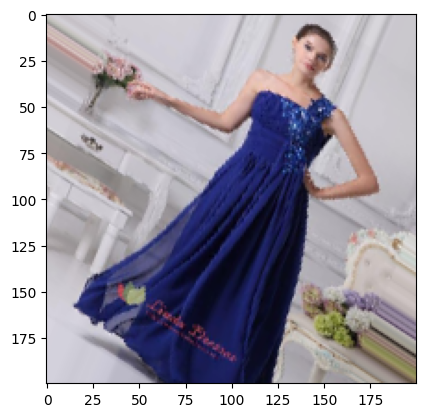

(32, 200, 200, 3)


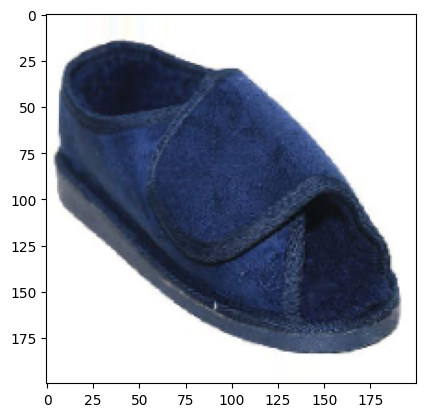

(32, 200, 200, 3)


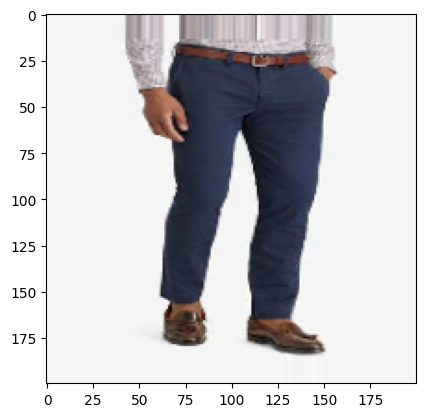

(32, 200, 200, 3)


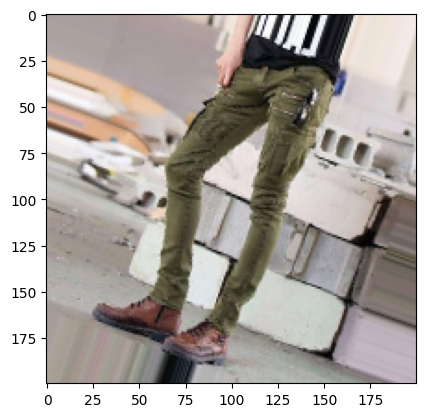

(32, 200, 200, 3)


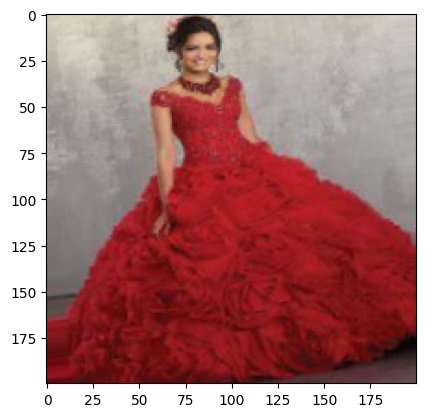

(32, 200, 200, 3)


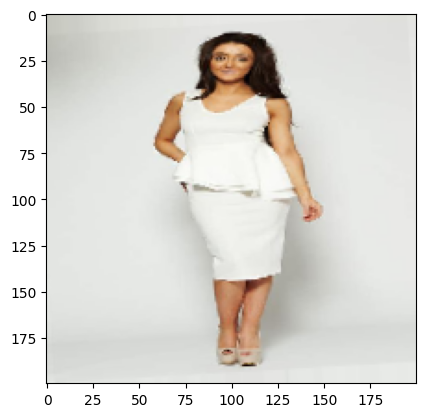

(32, 200, 200, 3)


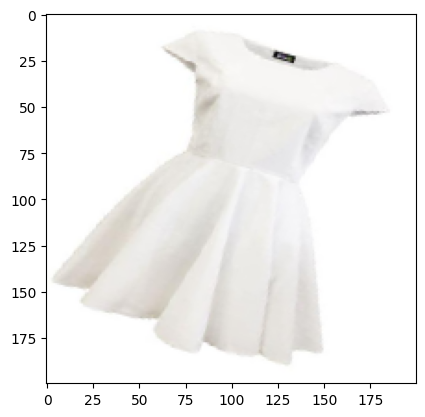

(32, 200, 200, 3)


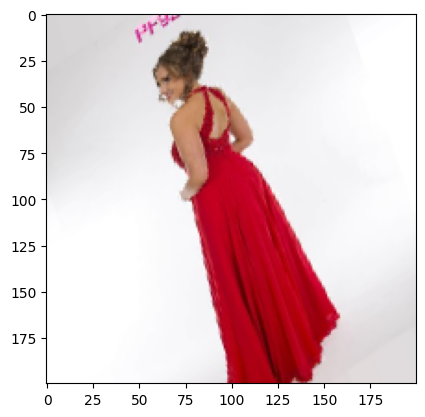

(32, 200, 200, 3)


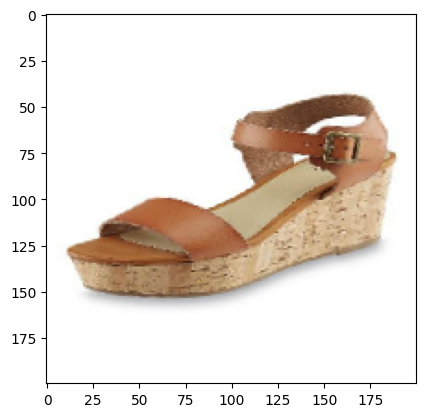

(32, 200, 200, 3)


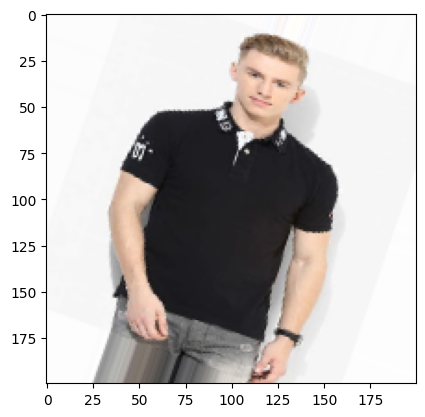

In [6]:
for _ in range(10):
    img, label = train_image.next()
    print(img.shape)
    plt.imshow(img[1])
    plt.show()

---

### Modeling dan Training

Melakukan penyusunan *layers neural network* untuk model.

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=[200, 200, 3]),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])

Menampilkan ringkasan dari jaringan syaraf yang sebelumnya sudah dibuat.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 64)                4

Melakukan *compiling* pada model dengan menentukan *optimizer*, fungsi *loss*, dan metrik yang akan ditampilkan.

In [9]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Melakukan *fitting* pada model.

In [10]:
result = model.fit(
    train_image,
    epochs=20,
    validation_data=validation_image,
    steps_per_epoch=100
)

Epoch 1/20
100/100 [==============================] - 198s 2s/step - loss: 2.7512 - accuracy: 0.2731 - val_loss: 1.7645 - val_accuracy: 0.5394
Epoch 2/20
100/100 [==============================] - 183s 2s/step - loss: 1.4119 - accuracy: 0.5984 - val_loss: 1.0534 - val_accuracy: 0.6887
Epoch 3/20
100/100 [==============================] - 163s 2s/step - loss: 1.0682 - accuracy: 0.6797 - val_loss: 0.9931 - val_accuracy: 0.7102
Epoch 4/20
100/100 [==============================] - 153s 2s/step - loss: 0.8917 - accuracy: 0.7247 - val_loss: 0.7976 - val_accuracy: 0.7627
Epoch 5/20
100/100 [==============================] - 150s 1s/step - loss: 0.8656 - accuracy: 0.7334 - val_loss: 0.7864 - val_accuracy: 0.7815
Epoch 6/20
100/100 [==============================] - 143s 1s/step - loss: 0.8146 - accuracy: 0.7372 - val_loss: 0.7062 - val_accuracy: 0.7877
Epoch 7/20
100/100 [==============================] - 144s 1s/step - loss: 0.7178 - accuracy: 0.7746 - val_loss: 0.6188 - val_accuracy: 0.8170

---

### Visualisasi Hasil

Menyimpan hasil *fitting* ke dalam variabel, dan menghitung jumlah *epochs*-nya.

In [11]:
accuracy_train = result.history['accuracy']
loss_train = result.history['loss']

accuracy_val = result.history['val_accuracy']
loss_val = result.history['val_loss']

x_length = range(len(accuracy_train))

Melakukan visualisasi hasil *fitting*.

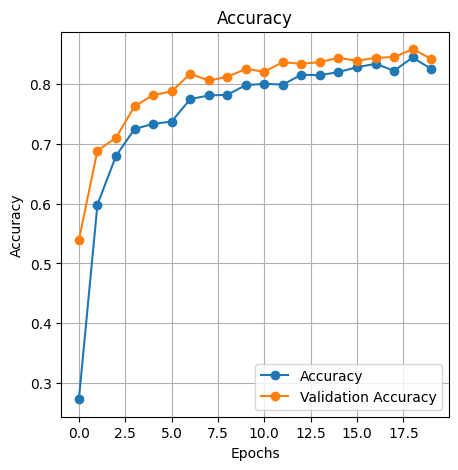

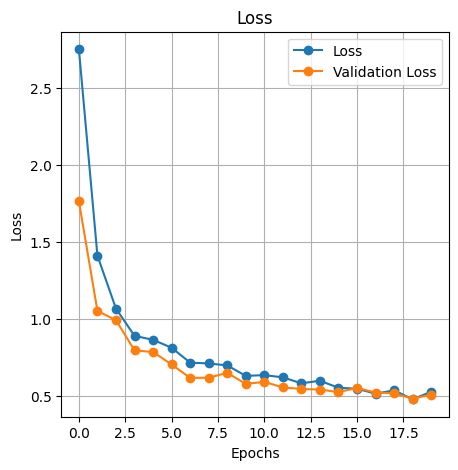

In [12]:
plt.figure(1, figsize=(5, 5))
plt.plot(x_length, accuracy_train, "o-", label="Accuracy")
plt.plot(x_length, accuracy_val, "o-", label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.grid()

plt.figure(2, figsize=(5, 5))
plt.plot(x_length, loss_train, "o-", label="Loss")
plt.plot(x_length, loss_val, "o-", label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.grid()

---